In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn import metrics

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Steps for analysis

- 1. Load and inspect the dataset
- 2. Null values handling
- 3. Analysis of numerical columns 
- 4. Analyzing categorical columns
- 5. Train-test split
- 6. Scaling the features
- 7. Feature selection using RFE
- 8. Model building
- 9. Finding the optimal cut-off point
- 10. Training data predictions on final model
- 11. ROC curve
- 12. Making Predictions on test dataset

### 1. Load and Inspect the data

In [2]:
#Load the dataframe
leads = pd.read_csv(r'E:\Data_Science_Course\6_Machine_Learning\6_Leed_Generation_Case_Study\Lead_Scoring_Assignment\Leads.csv')
leads.head(3)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened


In [3]:
#shape of dataframe
leads.shape

(9240, 37)

In [4]:
#columns info
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

- Lot of the variables are categorical in nature.
- Also, there seems to be a number of columns with null values from the value count.

In [5]:
leads.describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000,16.000000,19.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000,17.000000,20.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000,17.000000,20.000000


- Only handful of numerical colums
- 'Asymmetrique Activity Score' and 'Asymmetrique Profile Score' have high number of null values
- Outliers in 'TotalVisits', also possibly in 'Total Time Spent on Website'

### 2. Null values handling


In [6]:
leads.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

Create a dataframe to represen the number of null values in each column

In [7]:
nulls = pd.DataFrame({'Columns':leads.columns,'Null_Value_Cnt':leads.isnull().sum(),'Null_Value_Perc':round(((leads.isnull().sum()) / leads.shape[0] * 100),2)})
nulls = nulls.reset_index(drop=True)

In [8]:
nulls.sort_values(by='Null_Value_Perc', axis=0, ascending=False)

,Columns,Null_Value_Cnt,Null_Value_Perc
25,Lead Quality,4767,51.59
30,Asymmetrique Activity Index,4218,45.65
33,Asymmetrique Profile Score,4218,45.65
32,Asymmetrique Activity Score,4218,45.65
31,Asymmetrique Profile Index,4218,45.65
24,Tags,3353,36.29
28,Lead Profile,2709,29.32
15,What matters most to you in choosing a course,2709,29.32
14,What is your current occupation,2690,29.11
11,Country,2461,26.63


Dropping columns with more than 30% null values.

In [9]:
#get the column names that have more than 30% missing values
cols_to_drop = nulls[nulls['Null_Value_Perc'] > 30.00]['Columns'].to_list()

# remove those columns from the leads dataframe
leads.drop(columns=cols_to_drop, axis=1, inplace=True)

#remove the column names from the nulls dataframe as well
nulls = nulls[~nulls.Columns.isin(cols_to_drop)]

#review the remaining null value columns
nulls.sort_values(by='Null_Value_Perc', axis=0, ascending=False)

,Columns,Null_Value_Cnt,Null_Value_Perc
15,What matters most to you in choosing a course,2709,29.32
28,Lead Profile,2709,29.32
14,What is your current occupation,2690,29.11
11,Country,2461,26.63
13,How did you hear about X Education,2207,23.89
12,Specialization,1438,15.56
29,City,1420,15.37
9,Page Views Per Visit,137,1.48
7,TotalVisits,137,1.48
10,Last Activity,103,1.11


In [10]:
leads.shape

(9240, 31)

6 columns have been dropped due to excess null values.

Columns that have been dropped👇

In [11]:
print(cols_to_drop)

['Tags', 'Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']


Hnadling null value columns one by one in decending order of percentage null values in them

In [12]:
# get a list of column names to be handled

#get columns where %Null Values !=0, sort them in decending order and store in a list
null_value_cols = nulls[nulls['Null_Value_Perc'] != 0].sort_values(by='Null_Value_Perc', axis=0, ascending=False)['Columns'].to_list()

In [13]:
null_value_cols

['What matters most to you in choosing a course',
 'Lead Profile',
 'What is your current occupation',
 'Country',
 'How did you hear about X Education',
 'Specialization',
 'City',
 'TotalVisits',
 'Page Views Per Visit',
 'Last Activity',
 'Lead Source']

Column 1: What matters most to you in choosing a course

In [14]:
nulls[nulls.Columns == 'What matters most to you in choosing a course']

,Columns,Null_Value_Cnt,Null_Value_Perc
15,What matters most to you in choosing a course,2709,29.32


In [15]:
#Contents of the colummn
leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [16]:
#percentage of 'Better Career Prospects' values in the column
6528 / (6528 + 2 + 1 + 2709) * 100

70.64935064935065

The contets of column are highly skewed. About 70% values are of one type and the other significant portion of values are null.

Hence, dropping this column from analysis.

In [17]:
#drop column from leads daaframe
leads = leads.drop('What matters most to you in choosing a course', axis=1)

#drop row from nulls dataframe
nulls = nulls[nulls.Columns != 'What matters most to you in choosing a course']

In [18]:
#check
leads.shape

(9240, 30)

In [19]:
#check
nulls.sort_values(by='Null_Value_Perc', axis=0, ascending=False).head()

,Columns,Null_Value_Cnt,Null_Value_Perc
28,Lead Profile,2709,29.32
14,What is your current occupation,2690,29.11
11,Country,2461,26.63
13,How did you hear about X Education,2207,23.89
12,Specialization,1438,15.56


Column 2: Lead Profile

In [20]:
nulls[nulls.Columns == 'Lead Profile']

,Columns,Null_Value_Cnt,Null_Value_Perc
28,Lead Profile,2709,29.32


In [21]:
#Contents of the colummn
leads['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

We know that Select also corressponds to null value in pur dataset.

Recalculating actual null value count

In [22]:
(4146+2709)/(leads.shape[0])*100

74.18831168831169

About 74% of the values in the column are null values.

Hence, dropping the column from further analysis.

In [23]:
#drop column from leads daaframe
leads = leads.drop('Lead Profile', axis=1)

#drop row from nulls dataframe
nulls = nulls[nulls.Columns != 'Lead Profile']

In [24]:
#check
leads.shape

(9240, 29)

In [25]:
#check
nulls.sort_values(by='Null_Value_Perc', axis=0, ascending=False).head()

,Columns,Null_Value_Cnt,Null_Value_Perc
14,What is your current occupation,2690,29.11
11,Country,2461,26.63
13,How did you hear about X Education,2207,23.89
12,Specialization,1438,15.56
29,City,1420,15.37


Column 3: What is your current occupation

In [26]:
nulls[nulls.Columns == 'What is your current occupation']

,Columns,Null_Value_Cnt,Null_Value_Perc
14,What is your current occupation,2690,29.11


In [27]:
#Contents of the colummn
leads['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [28]:
# % skewness in column values
5600/leads.shape[0]*100

60.60606060606061

- **Important observation :** The company is selling courses designed for working professionals, but majority of the targeted audience is unemployed.
- The column data is highly skewed
- Null value percentage is very high, close to 30%
- Imputing null values with mode value will further skew the column data

The above observation needs to be highlighted to business stakeholders and column can be dropped from further analysis.

In [29]:
#drop column from leads daaframe
leads = leads.drop('What is your current occupation', axis=1)

#drop row from nulls dataframe
nulls = nulls[nulls.Columns != 'What is your current occupation']

In [30]:
#check
leads.shape

(9240, 28)

In [31]:
#check
nulls.sort_values(by='Null_Value_Perc', axis=0, ascending=False).head()

,Columns,Null_Value_Cnt,Null_Value_Perc
11,Country,2461,26.63
13,How did you hear about X Education,2207,23.89
12,Specialization,1438,15.56
29,City,1420,15.37
7,TotalVisits,137,1.48


Column 4: Country

In [32]:
nulls[nulls.Columns == 'Country']

,Columns,Null_Value_Cnt,Null_Value_Perc
11,Country,2461,26.63


In [33]:
#Contents of the colummn
leads['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [34]:
# % skewness in column values
6492/leads.shape[0]*100

70.25974025974025

- **Important Observation:** Majority of the leads are Indian.
- Column data is highly skewed

Hence, dropping the column from further analysis

In [35]:
#drop column from leads daaframe
leads = leads.drop('Country', axis=1)

#drop row from nulls dataframe
nulls = nulls[nulls.Columns != 'Country']

In [36]:
#check
leads.shape

(9240, 27)

In [37]:
#check
nulls.sort_values(by='Null_Value_Perc', axis=0, ascending=False).head()

,Columns,Null_Value_Cnt,Null_Value_Perc
13,How did you hear about X Education,2207,23.89
12,Specialization,1438,15.56
29,City,1420,15.37
7,TotalVisits,137,1.48
9,Page Views Per Visit,137,1.48


Columnn 5: How did you hear about X Education

In [38]:
nulls[nulls.Columns == 'How did you hear about X Education']

,Columns,Null_Value_Cnt,Null_Value_Perc
13,How did you hear about X Education,2207,23.89


In [39]:
#Contents of the colummn
leads['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

We know that Select also corressponds to null value.

Calculating actual % of null values in column.

In [40]:
(2207+5043)/leads.shape[0]*100

78.46320346320347

About 78% of values in the column are null values.

Hence, dropping the column from further analysis.

In [41]:
#drop column from leads daaframe
leads = leads.drop('How did you hear about X Education', axis=1)

#drop row from nulls dataframe
nulls = nulls[nulls.Columns != 'How did you hear about X Education']

In [42]:
leads.shape

(9240, 26)

In [43]:
#check
nulls.sort_values(by='Null_Value_Perc', axis=0, ascending=False).head()

,Columns,Null_Value_Cnt,Null_Value_Perc
12,Specialization,1438,15.56
29,City,1420,15.37
7,TotalVisits,137,1.48
9,Page Views Per Visit,137,1.48
10,Last Activity,103,1.11


Column 6: Specialization

In [44]:
nulls[nulls.Columns == 'Specialization']

,Columns,Null_Value_Cnt,Null_Value_Perc
12,Specialization,1438,15.56


In [45]:
#Contents of the colummn
leads['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

We know that Select also corressponds to null value.

Calculating actual % of null values in column.

In [46]:
(1438+1942)/leads.shape[0]*100

36.58008658008658

- About 36% of the column data are null values.
- Column Definition: The industry domain in which the customer worked before. Includes the level 'Select Specialization' which means the customer had not selected this option while filling the form.
- Dropping all rows with missing values will significantly reduce the dataset.
- As per column definition, it seems to be iportant information for deciding what product to pitch to which customer.

Hence, creating separate section 'unknown' for the null values.

In [47]:
#iputing 'select' values with unknown
leads.loc[leads.loc[:,'Specialization'] == 'Select','Specialization'] = 'Unknown'

#imputing null values with unknown
leads['Specialization'].fillna('Unknown', inplace=True)

#check the updated values
leads['Specialization'].value_counts()

Unknown                              3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [48]:
#check
leads['Specialization'].isna().sum()

0

In [49]:
#updating the nulls dataframe
nulls.loc[nulls['Columns'] == 'Specialization','Null_Value_Cnt'] = 0
nulls.loc[nulls['Columns'] == 'Specialization','Null_Value_Perc'] = 0
nulls[nulls['Columns'] == 'Specialization']

,Columns,Null_Value_Cnt,Null_Value_Perc
12,Specialization,0,0.0


Column 7: City

In [50]:
nulls[nulls.Columns == 'City']

,Columns,Null_Value_Cnt,Null_Value_Perc
29,City,1420,15.37


In [51]:
#Contents of the colummn
leads['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

There is no significant information contained in this column.

Hence, dropping it from further analysis.

In [52]:
#drop column from leads daaframe
leads = leads.drop('City', axis=1)

#drop row from nulls dataframe
nulls = nulls[nulls.Columns != 'City']

In [53]:
#check
leads.shape

(9240, 25)

In [54]:
#check
nulls.sort_values(by='Null_Value_Perc', axis=0, ascending=False).head()

,Columns,Null_Value_Cnt,Null_Value_Perc
7,TotalVisits,137,1.48
9,Page Views Per Visit,137,1.48
10,Last Activity,103,1.11
3,Lead Source,36,0.39
0,Prospect ID,0,0.00


Column 8: TotalVisits

In [55]:
nulls[nulls.Columns == 'TotalVisits']

,Columns,Null_Value_Cnt,Null_Value_Perc
7,TotalVisits,137,1.48


In [56]:
#Contents of the colummn
leads['TotalVisits'].value_counts().head()

0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
Name: TotalVisits, dtype: int64

- Null value % is very low.
- As per column definition, majority of the leads have never visited the website.
- About 23% of the leads have never visited the website. Imputing the null values with mode value will not further skew the column data

In [57]:
#Impute the missing values with mode value
leads['TotalVisits'].fillna(leads['TotalVisits'].mode()[0], inplace=True)

#check
leads['TotalVisits'].isna().sum()

0

In [58]:
#updating the nulls dataframe
#updating the nulls dataframe
nulls.loc[nulls['Columns'] == 'TotalVisits','Null_Value_Cnt'] = 0
nulls.loc[nulls['Columns'] == 'TotalVisits','Null_Value_Perc'] = 0
nulls[nulls['Columns'] == 'TotalVisits']

,Columns,Null_Value_Cnt,Null_Value_Perc
7,TotalVisits,0,0.0


Column 9: Page Views Per Visit

In [59]:
nulls[nulls.Columns == 'Page Views Per Visit']

,Columns,Null_Value_Cnt,Null_Value_Perc
9,Page Views Per Visit,137,1.48


In [60]:
#Contents of the colummn
leads['TotalVisits'].value_counts().head()

0.0    2326
2.0    1680
3.0    1306
4.0    1120
5.0     783
Name: TotalVisits, dtype: int64

- Null value % is very low.
- As per column definition, majority of the leads have never visited a single page of the website.
- About 25% of the leads have never visited the website. Imputing the null values with mode value will not further skew the column data

In [61]:
#Impute the missing values with mode value
leads['Page Views Per Visit'].fillna(leads['Page Views Per Visit'].mode()[0], inplace=True)

#check
leads['Page Views Per Visit'].isna().sum()

0

In [62]:
#updating the nulls dataframe
nulls.loc[nulls['Columns'] == 'Page Views Per Visit','Null_Value_Cnt'] = 0
nulls.loc[nulls['Columns'] == 'Page Views Per Visit','Null_Value_Perc'] = 0
nulls[nulls['Columns'] == 'Page Views Per Visit']

,Columns,Null_Value_Cnt,Null_Value_Perc
9,Page Views Per Visit,0,0.0


Column 10: Last Activity

In [63]:
nulls[nulls.Columns == 'Last Activity']

,Columns,Null_Value_Cnt,Null_Value_Perc
10,Last Activity,103,1.11


In [64]:
#Contents of the colummn
leads['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

- Only a small number of values are null in the column.
- As per column definition, column seems to be important.
- Data distribution is also not highly skewed.

Hence, dropping null value entries.

In [65]:
#drop null value entries
leads.dropna(subset=['Last Activity'], inplace=True)

#check
leads['Last Activity'].isna().sum()

0

In [66]:
#updating the nulls dataframe
nulls.loc[nulls['Columns'] == 'Last Activity','Null_Value_Cnt'] = 0
nulls.loc[nulls['Columns'] == 'Last Activity','Null_Value_Perc'] = 0
nulls[nulls['Columns'] == 'Last Activity']

,Columns,Null_Value_Cnt,Null_Value_Perc
10,Last Activity,0,0.0


Column 11: Lead Source

In [67]:
#Recalculating the number of null values in 'Lead Source' column
nulls.loc[nulls['Columns'] == 'Lead Source','Null_Value_Cnt'] = leads['Lead Source'].isna().sum()
nulls.loc[nulls['Columns'] == 'Lead Source','Null_Value_Perc'] = round((leads['Lead Source'].isna().sum() / leads.shape[0] * 100),2)
nulls[nulls['Columns'] == 'Lead Source']

,Columns,Null_Value_Cnt,Null_Value_Perc
3,Lead Source,34,0.37


A few of the null value records for 'Lead Source' column were dropped as part of 'Last Activity' column clean up

In [68]:
#Contents of the colummn
leads['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             462
Welingak Website      129
Referral Sites        125
Facebook               39
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

- The data distribution is unskewed in the column.
- Less than 1% of the values are missing in the column.

Imputing the missing values with mode value in the column

In [69]:
#Impute the missing values with mode value
leads['Lead Source'].fillna(leads['Lead Source'].mode()[0], inplace=True)

#check
leads['Lead Source'].isna().sum()

0

In [70]:
#updating the nulls dataframe
nulls.loc[nulls['Columns'] == 'Lead Source','Null_Value_Cnt'] = 0
nulls.loc[nulls['Columns'] == 'Lead Source','Null_Value_Perc'] = 0
nulls[nulls['Columns'] == 'Lead Source']

,Columns,Null_Value_Cnt,Null_Value_Perc
3,Lead Source,0,0.0


All null values have now been treated in the 'leads' dataset.

Looking further for 'select' values, as they also corresspond to null values but are not captured in default pandas expression.

In [71]:
(leads == 'Select').sum(axis=0).sort_values(ascending=False)

Prospect ID                                 0
Magazine                                    0
A free copy of Mastering The Interview      0
I agree to pay the amount through cheque    0
Get updates on DM Content                   0
Update me on Supply Chain Content           0
Receive More Updates About Our Courses      0
Through Recommendations                     0
Digital Advertisement                       0
Newspaper                                   0
X Education Forums                          0
Newspaper Article                           0
Search                                      0
Lead Number                                 0
Specialization                              0
Last Activity                               0
Page Views Per Visit                        0
Total Time Spent on Website                 0
TotalVisits                                 0
Converted                                   0
Do Not Call                                 0
Do Not Email                      

Hence, there are no null values in the dataframe now

Inspecting the leads dataframe

In [72]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9137 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9137 non-null   object 
 1   Lead Number                               9137 non-null   int64  
 2   Lead Origin                               9137 non-null   object 
 3   Lead Source                               9137 non-null   object 
 4   Do Not Email                              9137 non-null   object 
 5   Do Not Call                               9137 non-null   object 
 6   Converted                                 9137 non-null   int64  
 7   TotalVisits                               9137 non-null   float64
 8   Total Time Spent on Website               9137 non-null   int64  
 9   Page Views Per Visit                      9137 non-null   float64
 10  Last Activity                       

### 3. Analysis of Numerical Columns

In [73]:
num_cols = [col for col in leads.columns if leads[col].dtype in ['int64','float64']]
num_cols

['Lead Number',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

Column 1: Prospect ID

In [74]:
leads['Prospect ID']

0       7927b2df-8bba-4d29-b9a2-b6e0beafe620
1       2a272436-5132-4136-86fa-dcc88c88f482
2       8cc8c611-a219-4f35-ad23-fdfd2656bd8a
3       0cc2df48-7cf4-4e39-9de9-19797f9b38cc
4       3256f628-e534-4826-9d63-4a8b88782852
                        ...                 
9235    19d6451e-fcd6-407c-b83b-48e1af805ea9
9236    82a7005b-7196-4d56-95ce-a79f937a158d
9237    aac550fe-a586-452d-8d3c-f1b62c94e02c
9238    5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9
9239    571b5c8e-a5b2-4d57-8574-f2ffb06fdeff
Name: Prospect ID, Length: 9137, dtype: object

this is a unique identifier, apha-numeric in nature which will not contribute any significannt data towards model building/improvement.

Column 2: Lead Number

In [75]:
#column values
leads[num_cols[0]]

0       660737
1       660728
2       660727
3       660719
4       660681
         ...  
9235    579564
9236    579546
9237    579545
9238    579538
9239    579533
Name: Lead Number, Length: 9137, dtype: int64

As per data dictionary, this is just a number assigned to each lead. Hence, column data does not have any sigificannce in prediction sense other than identification of lead.

Hence, dropping the column from further analysis.

In [76]:
leads.drop('Lead Number', axis=1, inplace=True)

In [77]:
#check
leads.shape

(9137, 24)

Column 3: Converted

This is our target variable

In [78]:
#column values
leads[num_cols[1]].value_counts()

0    5657
1    3480
Name: Converted, dtype: int64

Column 4: TotalVisits

In [79]:
num_cols[2]

'TotalVisits'

In [80]:
#column values
leads[num_cols[2]].value_counts().head(10)

0.0    2223
2.0    1680
3.0    1306
4.0    1120
5.0     783
6.0     466
1.0     395
7.0     309
8.0     224
9.0     164
Name: TotalVisits, dtype: int64

In [81]:
#column value description
leads['TotalVisits'].describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count    9137.000000
mean        3.432418
std         4.850349
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

From the percentile breakdown of the column values, it is evident that there is presence of outliers in the column

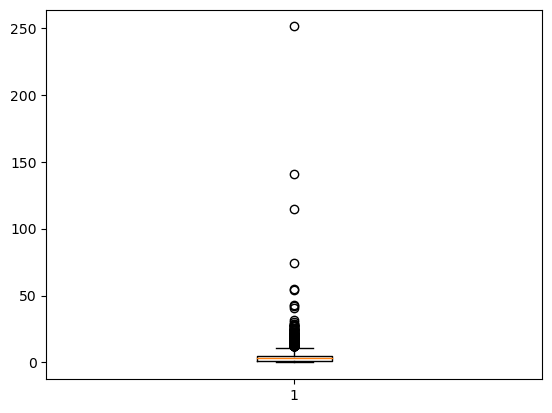

In [82]:
plt.boxplot(leads['TotalVisits']);

Dropping outliers from the column

In [83]:
#get mean and standard deviation
mean = leads['TotalVisits'].mean()
std = leads['TotalVisits'].std()

#define outlier threshold
lower_threshold = mean - (3 * std)
upper_threshold = mean + (3 * std)

#drop outliers
leads = leads[((leads['TotalVisits'] >= lower_threshold) & (leads['TotalVisits'] <= upper_threshold))]

In [84]:
#column value description
leads['TotalVisits'].describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count    9054.000000
mean        3.194941
std         2.990927
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%         9.000000
99%        13.470000
max        17.000000
Name: TotalVisits, dtype: float64

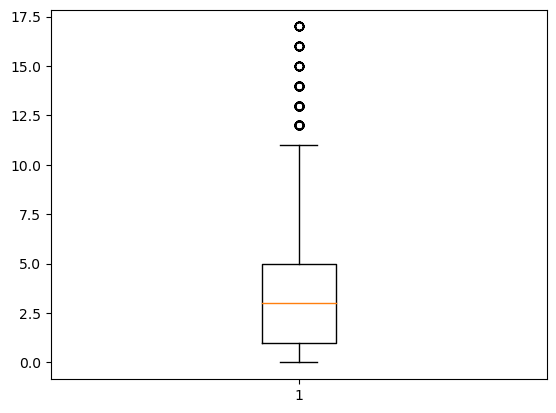

In [85]:
plt.boxplot(leads['TotalVisits'])
plt.show()

In [86]:
#check
leads.shape

(9054, 24)

Column 5: Total Time Spent on Website

In [87]:
num_cols[3]

'Total Time Spent on Website'

In [88]:
#column values
leads[num_cols[3]].value_counts()

0       2193
60        19
75        18
127       18
234       17
        ... 
2111       1
1091       1
649        1
748        1
1845       1
Name: Total Time Spent on Website, Length: 1718, dtype: int64

In [89]:
#column value description
leads['Total Time Spent on Website'].describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count    9054.000000
mean      480.917274
std       545.246210
min         0.000000
25%         8.000000
50%       244.000000
75%       918.000000
90%      1372.000000
95%      1556.000000
99%      1839.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

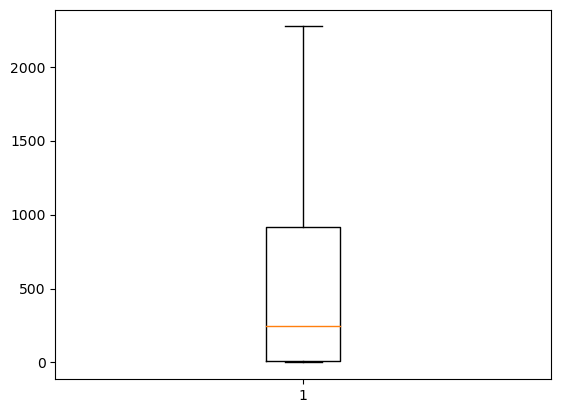

In [90]:
plt.boxplot(leads['Total Time Spent on Website']);

Column does not have outliers

Column 6: Page Views Per Visit

In [91]:
num_cols[4]

'Page Views Per Visit'

In [92]:
#column values
leads[num_cols[4]].value_counts()

0.00    2223
2.00    1792
3.00    1193
4.00     893
1.00     651
        ... 
1.31       1
2.13       1
2.14       1
1.63       1
1.17       1
Name: Page Views Per Visit, Length: 73, dtype: int64

In [93]:
#column value description
leads['Page Views Per Visit'].describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count    9054.000000
mean        2.328493
std         2.063445
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

From the percentile breakdown of the column values, it is evident that there is presence of outliers in the column

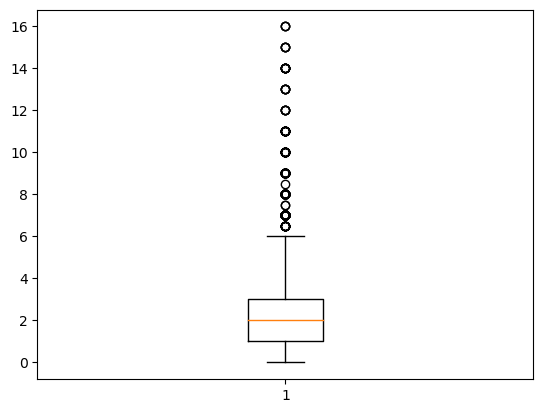

In [94]:
plt.boxplot(leads['Page Views Per Visit']);

Dropping outliers

In [95]:
#get mean and standard deviation
mean = leads['Page Views Per Visit'].mean()
std = leads['Page Views Per Visit'].std()

#define outlier threshold
lower_threshold = mean - (3 * std)
upper_threshold = mean + (3 * std)

#drop outliers
leads = leads[((leads['Page Views Per Visit'] >= lower_threshold) & (leads['Page Views Per Visit'] <= upper_threshold))]

In [96]:
#column value description
leads['Page Views Per Visit'].describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count    8942.000000
mean        2.224355
std         1.840066
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         7.000000
max         8.500000
Name: Page Views Per Visit, dtype: float64

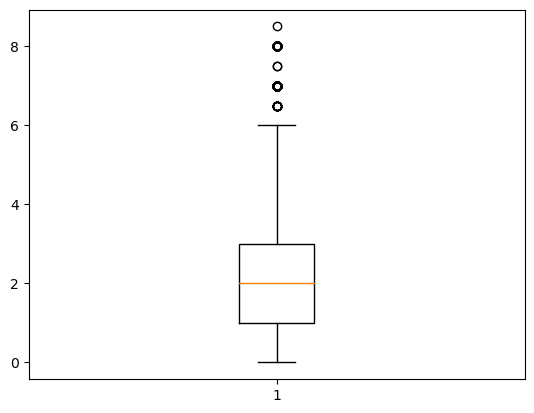

In [97]:
plt.boxplot(leads['Page Views Per Visit']);

In [98]:
#check
leads.shape

(8942, 24)

### 4. Analyzing categorical columns

In [99]:
non_num_cols = [col for col in leads.columns if ((leads[col].dtype == 'object')&(col != 'Prospect ID'))]
non_num_cols

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Specialization',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

- If the column is binary type, convert it using a binary mapping function
- If the column is categorical, convert with dummy variables

Column 1: Lead Origin

In [100]:
non_num_cols[0]

'Lead Origin'

In [101]:
#contents of the column
leads[non_num_cols[0]].value_counts()

Landing Page Submission    4728
API                        3544
Lead Add Form               630
Lead Import                  39
Quick Add Form                1
Name: Lead Origin, dtype: int64


This is a categorical column, converting it into n-1 dummy variables with the column_name as prefix

In [102]:
#create dummy variables for the variable
lo1 = pd.get_dummies(leads['Lead Origin'], prefix='Lead_Origin')

#istead of using drop_first = True, we will manually drop the dummy variable 'Lead_Origin_Quick Add Form'
lo1 = lo1.drop('Lead_Origin_Quick Add Form', axis=1)

#overview
lo1.head()

,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import
0,1,0,0,0
1,1,0,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [103]:
#Adding the dummies to master dataframe
leads = pd.concat([leads,lo1], axis=1)

#check
leads.shape

(8942, 28)

In [104]:
#drop the original column from leads dataframe
leads.drop(non_num_cols[0], axis=1, inplace=True)

#check
leads.shape

(8942, 27)

Column 2: Lead Source

In [105]:
non_num_cols[1]

'Lead Source'

In [106]:
#contents of the column
leads[non_num_cols[1]].value_counts()

Google               2858
Direct Traffic       2487
Olark Chat           1753
Organic Search       1074
Reference             461
Welingak Website      129
Referral Sites        114
Facebook               39
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
youtubechannel          1
Press_Release           1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

This is a categorical column, converting it into n-1 dummy variables with the column_name as prefix

In [107]:
#create dummy variables for the variable
ls1 = pd.get_dummies(leads[non_num_cols[1]], prefix='Lead_Source')

#istead of using drop_first = True, we will manually drop the dummy variable 'Lead_Source_NC_EDM'
ls1 = ls1.drop('Lead_Source_NC_EDM', axis=1)

#overview
ls1.head()

,Lead_Source_Click2call,Lead_Source_Direct Traffic,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Live Chat,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Pay per Click Ads,Lead_Source_Press_Release,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Social Media,Lead_Source_WeLearn,Lead_Source_Welingak Website,Lead_Source_bing,Lead_Source_blog,Lead_Source_google,Lead_Source_testone,Lead_Source_welearnblog_Home,Lead_Source_youtubechannel
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [108]:
#Adding the dummies to master dataframe
leads = pd.concat([leads,ls1], axis=1)

#check
leads.shape

(8942, 47)

In [109]:
#drop the original column from leads dataframe
leads.drop(non_num_cols[1], axis=1, inplace=True)

#check
leads.shape

(8942, 46)

Column 3: Do Not Email

In [110]:
non_num_cols[2]

'Do Not Email'

In [111]:
#contents of the column
leads[non_num_cols[2]].value_counts()

No     8238
Yes     704
Name: Do Not Email, dtype: int64

This is a yes/no type column.

Define binary mapping function for it and convert the column into numerical type.

In [112]:
def binary(x):
    return ({'Yes':1, 'No':0}).get(x)

In [113]:
#applying binary function
leads[non_num_cols[2]] = leads[non_num_cols[2]].map(binary)

#check
leads[non_num_cols[2]].info()

<class 'pandas.core.series.Series'>
Int64Index: 8942 entries, 0 to 9239
Series name: Do Not Email
Non-Null Count  Dtype
--------------  -----
8942 non-null   int64
dtypes: int64(1)
memory usage: 139.7 KB


In [114]:
#check
leads[non_num_cols[2]].value_counts()

0    8238
1     704
Name: Do Not Email, dtype: int64

Column 4: Do Not Call

In [115]:
non_num_cols[3]

'Do Not Call'

In [116]:
#contents of the column
leads[non_num_cols[3]].value_counts()

No     8940
Yes       2
Name: Do Not Call, dtype: int64

- The data in the column is very highly skewed.
- **The point needs to be highlighted to business stakeholders that about 99% of leads do not prefer calling.**

Hence, the column can be dropped from further analysis.

In [117]:
leads.drop(non_num_cols[3], axis=1, inplace=True)

In [118]:
#check
leads.shape

(8942, 45)

Column 5: Last Activity

In [119]:
non_num_cols[4]

'Last Activity'

In [120]:
#contents of the column
leads[non_num_cols[4]].value_counts()

Email Opened                    3370
SMS Sent                        2689
Olark Chat Conversation          965
Page Visited on Website          592
Converted to Lead                427
Email Bounced                    323
Email Link Clicked               264
Form Submitted on Website        114
Unreachable                       90
Unsubscribed                      60
Had a Phone Conversation          29
Approached upfront                 9
View in browser link Clicked       4
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [121]:
#create dummy variables for the variable
la1 = pd.get_dummies(leads[non_num_cols[4]], prefix='Last_Activity')

#istead of using drop_first = True, we will manually drop the dummy variable 'Last_Activity_Visited Booth in Tradeshow'
la1 = la1.drop('Last_Activity_Visited Booth in Tradeshow', axis=1)

#overview
la1.head()

,Last_Activity_Approached upfront,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Marked Spam,Last_Activity_Email Opened,Last_Activity_Email Received,Last_Activity_Form Submitted on Website,Last_Activity_Had a Phone Conversation,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_Resubscribed to emails,Last_Activity_SMS Sent,Last_Activity_Unreachable,Last_Activity_Unsubscribed,Last_Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [122]:
#Adding the dummies to master dataframe
leads = pd.concat([leads,la1], axis=1)

#drop the original column from leads dataframe
leads.drop(non_num_cols[4], axis=1, inplace=True)

#check
leads.shape

(8942, 60)

Column 6: Specialization

In [123]:
non_num_cols[5]

'Specialization'

In [124]:
#contents of the column
leads[non_num_cols[5]].value_counts()

Unknown                              3301
Finance Management                    947
Human Resource Management             815
Marketing Management                  811
Operations Management                 492
Business Administration               391
IT Projects Management                358
Supply Chain Management               334
Banking, Investment And Insurance     319
Media and Advertising                 195
Travel and Tourism                    187
International Business                173
Healthcare Management                 150
E-COMMERCE                            107
Hospitality Management                105
Retail Management                      95
Rural and Agribusiness                 70
E-Business                             54
Services Excellence                    38
Name: Specialization, dtype: int64

This is a categorical columns, create n-1 dummy variables for it and add to the original dataframe.

In [125]:
#create dummy variables for the variable
#we are using drop_first = True to drop the variable column for 'unknown' Specialization category
sp1 = pd.get_dummies(leads[non_num_cols[5]], prefix='Specialization', drop_first=True)

#overview
sp1.head()

,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [126]:
#Adding the dummies to master dataframe
leads = pd.concat([leads,sp1], axis=1)

#drop the original column from leads dataframe
leads.drop(non_num_cols[5], axis=1, inplace=True)

#check
leads.shape

(8942, 77)

Column 7: Search

In [127]:
non_num_cols[6]

'Search'

In [128]:
#contents of the column
leads[non_num_cols[6]].value_counts()

No     8929
Yes      13
Name: Search, dtype: int64

**Business Observation: As per data dictionary, it can be conveyed to busiess stakeholders that almost none of the leads have seen their search ads.**

Dropping this column from further analysis as it is irrelevant from a model bulding perspective.

In [129]:
leads.drop(non_num_cols[6], axis=1, inplace=True)

#check
leads.shape

(8942, 76)

Column 8: Magazine

In [130]:
non_num_cols[7]

'Magazine'

In [131]:
#contents of the column
leads[non_num_cols[7]].value_counts()

No    8942
Name: Magazine, dtype: int64

**Business Observation: As per data dictionary, it can be conveyed to busiess stakeholders that none of the leads have seen their as in magazine.**

Dropping this column from further analysis as it is irrelevant from a model bulding perspective.

In [132]:
leads.drop(non_num_cols[7], axis=1, inplace=True)

#check
leads.shape

(8942, 75)

Column 9: Newspaper Article

In [133]:
non_num_cols[8]

'Newspaper Article'

In [134]:
#contents of the column
leads[non_num_cols[8]].value_counts()

No    8942
Name: Newspaper Article, dtype: int64

**Business Observation: As per data dictionary, it can be conveyed to busiess stakeholders that none of the leads have seen their ad in newspaper.**

Dropping this column from further analysis as it is irrelevant from a model bulding perspective.

In [135]:
leads.drop(non_num_cols[8], axis=1, inplace=True)

#check
leads.shape

(8942, 74)

Column 10: X Education Forms

In [136]:
non_num_cols[9]

'X Education Forums'

In [137]:
#contents of the column
leads[non_num_cols[9]].value_counts()

No    8942
Name: X Education Forums, dtype: int64

**Business Observation: As per data dictionary, it can be conveyed to busiess stakeholders that none of the leads have seen the X Education forms.**

Dropping this column from further analysis as it is irrelevant from a model bulding perspective.

In [138]:
leads.drop(non_num_cols[9], axis=1, inplace=True)

#check
leads.shape

(8942, 73)

Column 11: Newspaper

In [139]:
non_num_cols[10]

'Newspaper'

In [140]:
#contents of the column
leads[non_num_cols[10]].value_counts()

No     8941
Yes       1
Name: Newspaper, dtype: int64

**Business Observation: As per data dictionary, it can be conveyed to busiess stakeholders that almost none of the leads have seen their ad in newspaper.**

Dropping this column from further analysis as it is irrelevant from a model bulding perspective.

In [141]:
leads.drop(non_num_cols[10], axis=1, inplace=True)

#check
leads.shape

(8942, 72)

Column 12: Digital Advertisement

In [142]:
non_num_cols[11]

'Digital Advertisement'

In [143]:
#contents of the column
leads[non_num_cols[11]].value_counts()

No     8940
Yes       2
Name: Digital Advertisement, dtype: int64

**Business Observation: As per data dictionary, it can be conveyed to busiess stakeholders that almost none of the leads have seen their digital advertisement.**

Dropping this column from further analysis as it is irrelevant from a model bulding perspective.

In [144]:
leads.drop(non_num_cols[11], axis=1, inplace=True)

#check
leads.shape

(8942, 71)

Column 13: Through Recommendations

In [145]:
non_num_cols[12]

'Through Recommendations'

In [146]:
#contents of the column
leads[non_num_cols[12]].value_counts()

No     8936
Yes       6
Name: Through Recommendations, dtype: int64

**Business Observation: As per data dictionary, we can conclude that almost none of of the leads came in through recomendation.**

Dropping this column from further analysis, hence it does not contribute from a model building perspective.

In [147]:
leads.drop(non_num_cols[12], axis=1, inplace=True)

#check
leads.shape

(8942, 70)

Column 14: Receive More Updates About Our Courses

In [148]:
non_num_cols[13]

'Receive More Updates About Our Courses'

In [149]:
#contents of the column
leads[non_num_cols[13]].value_counts()

No    8942
Name: Receive More Updates About Our Courses, dtype: int64

**Business Observation: As per data dictionary, it can be conveyed to busiess stakeholders that none of the leads want to receive more updates about the company's courses.**

Dropping this column from further analysis as it is irrelevant from a model bulding perspective.

In [150]:
leads.drop(non_num_cols[13], axis=1, inplace=True)

#check
leads.shape

(8942, 69)

Column 15: Update me on Supply Chain Content

In [151]:
non_num_cols[14]

'Update me on Supply Chain Content'

In [152]:
#contents of the column
leads[non_num_cols[14]].value_counts()

No    8942
Name: Update me on Supply Chain Content, dtype: int64

**Business Observation: As per data dictionary, it can be conveyed to busiess stakeholders that none of the leads want updates on their supply chain content.**

Dropping this column from further analysis as it is irrelevant from a model bulding perspective.

In [153]:
leads.drop(non_num_cols[14], axis=1, inplace=True)

#check
leads.shape

(8942, 68)

Column 16: Get updates on DM Content

In [154]:
non_num_cols[15]

'Get updates on DM Content'

In [155]:
#contents of the column
leads[non_num_cols[15]].value_counts()

No    8942
Name: Get updates on DM Content, dtype: int64

**Business Observation: As per data dictionary, it can be conveyed to busiess stakeholders that none of the leads want updates on the DM content.**

Dropping this column from further analysis as it is irrelevant from a model bulding perspective.

In [156]:
leads.drop(non_num_cols[15], axis=1, inplace=True)

#check
leads.shape

(8942, 67)

Column 17: I agree to pay the amount through cheque

In [157]:
non_num_cols[16]

'I agree to pay the amount through cheque'

In [158]:
#contents of the column
leads[non_num_cols[16]].value_counts()

No    8942
Name: I agree to pay the amount through cheque, dtype: int64

**Business Observation: As per data dictionary, it can be conveyed to busiess stakeholders that none of the leads agreed to pay via cheque.**

Dropping this column from further analysis as it is irrelevant from a model bulding perspective.

In [159]:
leads.drop(non_num_cols[16], axis=1, inplace=True)

#check
leads.shape

(8942, 66)

Column 18: A free copy of Mastering The Interview

In [160]:
non_num_cols[17]

'A free copy of Mastering The Interview'

In [161]:
#contents of the column
leads[non_num_cols[17]].value_counts()

No     6172
Yes    2770
Name: A free copy of Mastering The Interview, dtype: int64

This is a yes/no type column, Converting it using binary mapping function.

Altough one can argue that this column is not iportant from a lead conversion point of view, but herein we do not have business stakeholders to discuss out this. So we will not drop the column for now.

In [162]:
#applying binary function
leads[non_num_cols[17]] = leads[non_num_cols[17]].map(binary)

#check
leads[non_num_cols[17]].value_counts()

0    6172
1    2770
Name: A free copy of Mastering The Interview, dtype: int64

Column 19: Last Notable Activity

In [163]:
non_num_cols[18]

'Last Notable Activity'

In [164]:
#check the number of object type columns
len(non_num_cols)

#Hence, we can say that we have analyzed all of the object type columns

19

In [165]:
#contents of the column
leads[non_num_cols[18]].value_counts()

Modified                        3247
Email Opened                    2772
SMS Sent                        2128
Page Visited on Website          287
Olark Chat Conversation          182
Email Link Clicked               170
Email Bounced                     59
Unsubscribed                      46
Unreachable                       31
Had a Phone Conversation          13
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

This is a categorical columns, create n-1 dummy variables for it and add to the original dataframe.

In [166]:
#create dummy variables for the variable
lna1 = pd.get_dummies(leads[non_num_cols[18]], prefix='Last_Notable_Activity')

#dropping column 'Last_Notable_Activity_Email Received' instead of using the drop_first = True
lna1.drop('Last_Notable_Activity_Email Received', axis=1, inplace=True)

#overview
lna1.head()

,Last_Notable_Activity_Approached upfront,Last_Notable_Activity_Email Bounced,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Marked Spam,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Form Submitted on Website,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_Resubscribed to emails,Last_Notable_Activity_SMS Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed,Last_Notable_Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [167]:
#Adding the dummies to master dataframe
leads = pd.concat([leads,lna1], axis=1)

#drop the original column from leads dataframe
leads.drop(non_num_cols[18], axis=1, inplace=True)

#check
leads.shape

(8942, 80)

### 5. Train - Test Split

In [168]:
#Prepare the features dataframe
X = leads.drop(['Prospect ID','Converted'], axis=1)

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Click2call,...,Last_Notable_Activity_Form Submitted on Website,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_Resubscribed to emails,Last_Notable_Activity_SMS Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed,Last_Notable_Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [169]:
#Prepare the target column series
y = leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [170]:
#Splitting the data into train-test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, test_size=0.3, random_state=100)

In [171]:
#check
X_train.shape

(6259, 78)

In [172]:
#check
y_test.shape

(2683,)

### 6. Scaling the Features

In [173]:
#get the updated list of numeric columns
num_cols = [col for col in num_cols if col in X_train.columns]
num_cols

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [174]:
#instantiate the scalar
scaler = MinMaxScaler()

#apply the scaler to the training dataset
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

#check
X_train[num_cols].describe(percentiles=[0,0.25,0.50,0.75,0.9,0.95,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,6259.000000,6259.000000,6259.000000
mean,0.181546,0.210148,0.260031
std,0.169453,0.240378,0.216548
min,0.000000,0.000000,0.000000
0%,0.000000,0.000000,0.000000
25%,0.000000,0.000440,0.000000
50%,0.176471,0.103433,0.235294
75%,0.235294,0.398548,0.352941
90%,0.411765,0.602641,0.588235
95%,0.470588,0.683583,0.705882


In [175]:
#check
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Click2call,...,Last_Notable_Activity_Form Submitted on Website,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_Resubscribed to emails,Last_Notable_Activity_SMS Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed,Last_Notable_Activity_View in browser link Clicked
8606,0,0.235294,0.050176,0.470588,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
988,0,0.117647,0.071303,0.235294,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4794,0,0.117647,0.518046,0.117647,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8893,0,0.235294,0.034771,0.470588,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2708,0,0.176471,0.192782,0.352941,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [176]:
#check
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6259 entries, 8606 to 5824
Data columns (total 78 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Do Not Email                                        6259 non-null   int64  
 1   TotalVisits                                         6259 non-null   float64
 2   Total Time Spent on Website                         6259 non-null   float64
 3   Page Views Per Visit                                6259 non-null   float64
 4   A free copy of Mastering The Interview              6259 non-null   int64  
 5   Lead_Origin_API                                     6259 non-null   uint8  
 6   Lead_Origin_Landing Page Submission                 6259 non-null   uint8  
 7   Lead_Origin_Lead Add Form                           6259 non-null   uint8  
 8   Lead_Origin_Lead Import                             6259 non-null   uint8  

In [177]:
#Checing the lead conversion rate
sum(y)/y.shape[0]*100

38.00044732721986

In [178]:
#Checking the lead conversion rate of training dataset
sum(y_train)/y_train.shape[0]*100

38.856047291899664

In [179]:
#checking the lead conversion rate of test dataset
sum(y_test)/y_test.shape[0]*100

36.004472605292584

### 7. Feature Selection using RFE

In [180]:
#create an instance of logistic regression
logreg = LogisticRegression()

#running RFE with 25 variables as output
rfe = RFE(logreg, n_features_to_select=25)

#prepare the RFE model
rfe = rfe.fit(X_train, y_train)

In [181]:
#Column rankings as per RFE
rfe_ranks = list(zip(X_train.columns, rfe.support_, rfe.ranking_))

#sort the column in ascending order of their ranks
rfe_ranks = sorted(rfe_ranks, key=lambda x:x[2])

#view
rfe_ranks

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead_Origin_API', True, 1),
 ('Lead_Origin_Landing Page Submission', True, 1),
 ('Lead_Origin_Lead Add Form', True, 1),
 ('Lead_Source_Olark Chat', True, 1),
 ('Lead_Source_Welingak Website', True, 1),
 ('Last_Activity_Approached upfront', True, 1),
 ('Last_Activity_Email Opened', True, 1),
 ('Last_Activity_Email Received', True, 1),
 ('Last_Activity_Olark Chat Conversation', True, 1),
 ('Last_Activity_SMS Sent', True, 1),
 ('Last_Activity_View in browser link Clicked', True, 1),
 ('Specialization_E-Business', True, 1),
 ('Specialization_Unknown', True, 1),
 ('Last_Notable_Activity_Email Link Clicked', True, 1),
 ('Last_Notable_Activity_Email Opened', True, 1),
 ('Last_Notable_Activity_Had a Phone Conversation', True, 1),
 ('Last_Notable_Activity_Modified', True, 1),
 ('Last_Notable_Activity_Olark Chat Conversation', True, 1),
 ('Last_Notable_Activity

In [182]:
#viewing columns selected by RFE
train_cols = X_train.columns[rfe.support_]
train_cols

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead_Origin_API',
       'Lead_Origin_Landing Page Submission', 'Lead_Origin_Lead Add Form',
       'Lead_Source_Olark Chat', 'Lead_Source_Welingak Website',
       'Last_Activity_Approached upfront', 'Last_Activity_Email Opened',
       'Last_Activity_Email Received', 'Last_Activity_Olark Chat Conversation',
       'Last_Activity_SMS Sent', 'Last_Activity_View in browser link Clicked',
       'Specialization_E-Business', 'Specialization_Unknown',
       'Last_Notable_Activity_Email Link Clicked',
       'Last_Notable_Activity_Email Opened',
       'Last_Notable_Activity_Had a Phone Conversation',
       'Last_Notable_Activity_Modified',
       'Last_Notable_Activity_Olark Chat Conversation',
       'Last_Notable_Activity_Page Visited on Website',
       'Last_Notable_Activity_Resubscribed to emails',
       'Last_Notable_Activity_Unreachable'],
      dtype='object')

### 8. Model building

Model - 1

In [183]:
X_train_sm = sm.add_constant(X_train[train_cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6259
Model:                            GLM   Df Residuals:                     6233
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2648.7
Date:                Tue, 18 Jul 2023   Deviance:                       5297.4
Time:                        00:20:53   Pearson chi2:                 6.16e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3873
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              0.2301      0.507      0.454      0.650      -0.763       1.223
Do Not Email                                      -1.3963      0.176     -7.937      0.000      -1.741      -1.052
TotalVisits                                        1.1672      0.292      3.992      0.000       0.594       1.740
Total Time Spent on Website                        4.5061      0.167     27.023      0.000       4.179       4.833
Page Views Per Visit                              -0.7756      0.256     -3.035      0.002      -1.276      -0.275
Lead_Origin_API                                   -0.3629      0.475     -0.764      0.445      -1.294       0.569
Lead_Origin_Landing Page Submission               -1.6615      0.475     -3.496      0.000      -2.593      -0.730
Lead_Origin_Lead Add Form                          3.1023      0.504      6.157      0.000       2.115       4.090
Lead_Source_Olark Chat                             1.1202      0.142      7.886      0.000       0.842       1.399
Lead_Source_Welingak Website                       3.0698      1.033      2.973      0.003       1.046       5.094
Last_Activity_Approached upfront                  23.1350   1.44e+04      0.002      0.999   -2.82e+04    2.82e+04
Last_Activity_Email Opened                         0.7665      0.167      4.577      0.000       0.438       1.095
Last_Activity_Email Received                      22.8952   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Last_Activity_Olark Chat Conversation             -0.9428      0.225     -4.182      0.000      -1.385      -0.501
Last_Activity_SMS Sent                             0.8915      0.158      5.646      0.000       0.582       1.201
Last_Activity_View in browser link Clicked       -22.5293   3.33e+04     -0.001      0.999   -6.53e+04    6.53e+04
Specialization_E-Business                          0.6310      0.455      1.387      0.166      -0.261       1.523
Specialization_Unknown                            -1.5993      0.125    -12.782      0.000      -1.845      -1.354
Last_Notable_Activity_Email Link Clicked          -1.1101      0.299     -3.718      0.000      -1.695      -0.525
Last_Notable_Activity_Email Opened                -1.4283      0.194     -7.374      0.000      -1.808      -1.049
Last_Notable_Activity_Had a Phone Conversation     1.6072      1.222      1.316      0.188      -0.787       4.001
Last_Notable_Activity_Modified                    -1.5019      0.137    -10.965      0.000      -1.770      -1.233
Last_Notable_Activity_Olark Chat Conversation     -0.9293      0.378     -2.462      0.014      -1.669      -0.189
Last_Notable_Activity_Page Visited on Website     -1.1082      0.259     -4.286      0.000   

In [184]:
#generating list of column to drop based on high p-values
drop_cols = ['Last_Activity_Approached upfront','Last_Activity_Email Received',
             'Last_Activity_View in browser link Clicked','Last_Notable_Activity_Resubscribed to emails']

#dropping above columns from analysis
train_cols1 = train_cols.drop(drop_cols)

#verify
print(len(train_cols) - len(train_cols1))

4


Model-2

In [185]:
X_train_sm = sm.add_constant(X_train[train_cols1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6259
Model:                            GLM   Df Residuals:                     6237
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2658.4
Date:                Tue, 18 Jul 2023   Deviance:                       5316.9
Time:                        00:20:53   Pearson chi2:                 6.18e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3854
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              0.2566      0.506      0.507      0.612      -0.735       1.248
Do Not Email                                      -1.4188      0.176     -8.083      0.000      -1.763      -1.075
TotalVisits                                        1.1576      0.292      3.963      0.000       0.585       1.730
Total Time Spent on Website                        4.5206      0.167     27.141      0.000       4.194       4.847
Page Views Per Visit                              -0.7550      0.255     -2.959      0.003      -1.255      -0.255
Lead_Origin_API                                   -0.3788      0.475     -0.797      0.426      -1.310       0.553
Lead_Origin_Landing Page Submission               -1.6556      0.475     -3.483      0.000      -2.587      -0.724
Lead_Origin_Lead Add Form                          3.1100      0.504      6.172      0.000       2.122       4.098
Lead_Source_Olark Chat                             1.1473      0.142      8.094      0.000       0.869       1.425
Lead_Source_Welingak Website                       3.0602      1.033      2.963      0.003       1.036       5.084
Last_Activity_Email Opened                         0.7215      0.166      4.345      0.000       0.396       1.047
Last_Activity_Olark Chat Conversation             -0.9923      0.224     -4.426      0.000      -1.432      -0.553
Last_Activity_SMS Sent                             0.8491      0.156      5.452      0.000       0.544       1.154
Specialization_E-Business                          0.6318      0.455      1.388      0.165      -0.260       1.524
Specialization_Unknown                            -1.5789      0.125    -12.669      0.000      -1.823      -1.335
Last_Notable_Activity_Email Link Clicked          -1.1547      0.297     -3.887      0.000      -1.737      -0.572
Last_Notable_Activity_Email Opened                -1.4262      0.193     -7.384      0.000      -1.805      -1.048
Last_Notable_Activity_Had a Phone Conversation     1.5719      1.221      1.288      0.198      -0.820       3.964
Last_Notable_Activity_Modified                    -1.5012      0.136    -11.017      0.000      -1.768      -1.234
Last_Notable_Activity_Olark Chat Conversation     -0.9285      0.377     -2.462      0.014      -1.668      -0.189
Last_Notable_Activity_Page Visited on Website     -1.1467      0.257     -4.461      0.000      -1.651      -0.643
Last_Notable_Activity_Unreachable                  1.0811      0.526      2.054      0.040       0.049       2.113
==================================================================================================================
"""

In [186]:
#generating list of column to drop based on high p-values
drop_cols1 = ['Lead_Origin_API','Specialization_E-Business','Last_Notable_Activity_Had a Phone Conversation']

#dropping above columns from analysis
train_cols2 = train_cols1.drop(drop_cols1)

#verify
print(len(train_cols1) - len(train_cols2))

3


Model - 3

In [187]:
X_train_sm = sm.add_constant(X_train[train_cols2])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6259
Model:                            GLM   Df Residuals:                     6240
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2660.8
Date:                Tue, 18 Jul 2023   Deviance:                       5321.6
Time:                        00:20:53   Pearson chi2:                 6.18e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3849
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.0665      0.216     -0.307      0.759      -0.491       0.358
Do Not Email                                     -1.4216      0.175     -8.126      0.000      -1.765      -1.079
TotalVisits                                       1.1400      0.291      3.921      0.000       0.570       1.710
Total Time Spent on Website                       4.5052      0.166     27.160      0.000       4.180       4.830
Page Views Per Visit                             -0.7715      0.254     -3.036      0.002      -1.270      -0.273
Lead_Origin_Landing Page Submission              -1.2863      0.125    -10.255      0.000      -1.532      -1.040
Lead_Origin_Lead Add Form                         3.4648      0.234     14.790      0.000       3.006       3.924
Lead_Source_Olark Chat                            1.1250      0.140      8.052      0.000       0.851       1.399
Lead_Source_Welingak Website                      3.0661      1.033      2.969      0.003       1.042       5.090
Last_Activity_Email Opened                        0.7146      0.165      4.322      0.000       0.391       1.039
Last_Activity_Olark Chat Conversation            -1.0035      0.224     -4.484      0.000      -1.442      -0.565
Last_Activity_SMS Sent                            0.8267      0.153      5.387      0.000       0.526       1.127
Specialization_Unknown                           -1.5899      0.124    -12.779      0.000      -1.834      -1.346
Last_Notable_Activity_Email Link Clicked         -1.1833      0.296     -4.004      0.000      -1.762      -0.604
Last_Notable_Activity_Email Opened               -1.4430      0.192     -7.517      0.000      -1.819      -1.067
Last_Notable_Activity_Modified                   -1.5147      0.135    -11.230      0.000      -1.779      -1.250
Last_Notable_Activity_Olark Chat Conversation    -0.9416      0.376     -2.501      0.012      -1.679      -0.204
Last_Notable_Activity_Page Visited on Website    -1.1620      0.255     -4.565      0.000      -1.661      -0.663
Last_Notable_Activity_Unreachable                 1.0493      0.525      1.997      0.046       0.019       2.079
=================================================================================================================
"""

Since, there is no given threshold for p-value with signifies the statistical relevance of the variables in the model. Wherein, higher the p-value, more insignificant is the variable. Hence, we drop the column with higher p-values in previous iterations.

Consideting a maximum p-value threshold of 0.05, the model haas all the statistically relevant feature variables.

Checking the VIF of variables

In [188]:
#create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

#get feature names
vif['Features'] = train_cols2

#get VIF scores
vif['VIF'] = [round(variance_inflation_factor(X_train[train_cols2].values, i),2) for i in range(X_train[train_cols2].shape[1])]

#sort the dataframe by VIF values
vif = vif.sort_values(by='VIF', ascending=False)

#print
vif

,Features,VIF
13,Last_Notable_Activity_Email Opened,8.61
8,Last_Activity_Email Opened,8.32
3,Page Views Per Visit,6.55
4,Lead_Origin_Landing Page Submission,5.30
1,TotalVisits,4.94
14,Last_Notable_Activity_Modified,3.56
10,Last_Activity_SMS Sent,3.53
11,Specialization_Unknown,3.46
6,Lead_Source_Olark Chat,2.68
9,Last_Activity_Olark Chat Conversation,2.34


Dropping highest VIF variable, as it means that is is quite well explained by other feature variables in the model due to presence of high multi-collinearity

In [189]:
train_cols3 = train_cols2.drop('Last_Notable_Activity_Email Opened')

#verify
print(len(train_cols2) - len(train_cols3))

1


Model - 4

In [190]:
X_train_sm = sm.add_constant(X_train[train_cols3])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6259
Model:                            GLM   Df Residuals:                     6241
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2688.8
Date:                Tue, 18 Jul 2023   Deviance:                       5377.5
Time:                        00:20:54   Pearson chi2:                 6.25e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3794
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.7151      0.197     -3.624      0.000      -1.102      -0.328
Do Not Email                                     -1.2830      0.171     -7.495      0.000      -1.618      -0.947
TotalVisits                                       1.1272      0.290      3.890      0.000       0.559       1.695
Total Time Spent on Website                       4.5212      0.165     27.365      0.000       4.197       4.845
Page Views Per Visit                             -0.7275      0.252     -2.888      0.004      -1.221      -0.234
Lead_Origin_Landing Page Submission              -1.2807      0.125    -10.231      0.000      -1.526      -1.035
Lead_Origin_Lead Add Form                         3.5013      0.234     14.977      0.000       3.043       3.959
Lead_Source_Olark Chat                            1.1602      0.139      8.334      0.000       0.887       1.433
Lead_Source_Welingak Website                      2.9509      1.032      2.860      0.004       0.929       4.973
Last_Activity_Email Opened                        0.0118      0.142      0.083      0.934      -0.266       0.289
Last_Activity_Olark Chat Conversation            -1.0711      0.223     -4.804      0.000      -1.508      -0.634
Last_Activity_SMS Sent                            1.2962      0.138      9.381      0.000       1.025       1.567
Specialization_Unknown                           -1.5682      0.124    -12.634      0.000      -1.812      -1.325
Last_Notable_Activity_Email Link Clicked         -0.5696      0.283     -2.014      0.044      -1.124      -0.015
Last_Notable_Activity_Modified                   -0.8449      0.098     -8.604      0.000      -1.037      -0.652
Last_Notable_Activity_Olark Chat Conversation    -0.2718      0.364     -0.746      0.456      -0.986       0.442
Last_Notable_Activity_Page Visited on Website    -0.5441      0.239     -2.272      0.023      -1.013      -0.075
Last_Notable_Activity_Unreachable                 1.6658      0.518      3.217      0.001       0.651       2.681
=================================================================================================================
"""

In [191]:
#Checking VIF's as well

#create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

#get feature names
vif['Features'] = train_cols3

#get VIF scores
vif['VIF'] = [round(variance_inflation_factor(X_train[train_cols3].values, i),2) for i in range(X_train[train_cols3].shape[1])]

#sort the dataframe by VIF values
vif = vif.sort_values(by='VIF', ascending=False)

#print
vif

,Features,VIF
3,Page Views Per Visit,6.51
1,TotalVisits,4.92
4,Lead_Origin_Landing Page Submission,4.89
8,Last_Activity_Email Opened,3.81
10,Last_Activity_SMS Sent,3.31
11,Specialization_Unknown,3.27
6,Lead_Source_Olark Chat,2.63
13,Last_Notable_Activity_Modified,2.32
9,Last_Activity_Olark Chat Conversation,2.29
2,Total Time Spent on Website,2.16


Page Views Per Visit = high VIF and low p-value = multicollinearity existes but is statistically relevant

Last_Activity_Email Opened = low VIF and high p-value = multicollinearity does not existes but is statistically irrelevant

Multicollinearity can cause unstable estimates and inflated standard errors, leading to difficulties in interpreting the individual effect of the variable. Hence, dropping 'Page Views Per Visit'

In [192]:
#dropping 'Page Views Per Visit' due to high p-value as well as high VIF

train_cols4 = train_cols3.drop('Page Views Per Visit')

#verify
print(len(train_cols3) - len(train_cols4))

1


Model - 5

In [193]:
X_train_sm = sm.add_constant(X_train[train_cols4])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6259
Model:                            GLM   Df Residuals:                     6242
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2693.0
Date:                Tue, 18 Jul 2023   Deviance:                       5385.9
Time:                        00:20:54   Pearson chi2:                 6.25e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3785
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.8378      0.193     -4.346      0.000      -1.216      -0.460
Do Not Email                                     -1.3030      0.171     -7.615      0.000      -1.638      -0.968
TotalVisits                                       0.7204      0.252      2.853      0.004       0.226       1.215
Total Time Spent on Website                       4.5286      0.165     27.402      0.000       4.205       4.853
Lead_Origin_Landing Page Submission              -1.3090      0.125    -10.498      0.000      -1.553      -1.065
Lead_Origin_Lead Add Form                         3.6375      0.229     15.871      0.000       3.188       4.087
Lead_Source_Olark Chat                            1.2842      0.133      9.671      0.000       1.024       1.544
Lead_Source_Welingak Website                      2.9443      1.032      2.854      0.004       0.922       4.966
Last_Activity_Email Opened                       -0.0110      0.141     -0.078      0.938      -0.288       0.266
Last_Activity_Olark Chat Conversation            -1.0840      0.223     -4.867      0.000      -1.520      -0.647
Last_Activity_SMS Sent                            1.2629      0.138      9.174      0.000       0.993       1.533
Specialization_Unknown                           -1.5488      0.124    -12.509      0.000      -1.791      -1.306
Last_Notable_Activity_Email Link Clicked         -0.5757      0.282     -2.043      0.041      -1.128      -0.023
Last_Notable_Activity_Modified                   -0.8473      0.098     -8.635      0.000      -1.040      -0.655
Last_Notable_Activity_Olark Chat Conversation    -0.2549      0.364     -0.701      0.483      -0.967       0.458
Last_Notable_Activity_Page Visited on Website    -0.4745      0.238     -1.995      0.046      -0.941      -0.008
Last_Notable_Activity_Unreachable                 1.6336      0.520      3.141      0.002       0.614       2.653
=================================================================================================================
"""

In [194]:
#Checking VIF's as well

#create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

#get feature names
vif['Features'] = train_cols4

#get VIF scores
vif['VIF'] = [round(variance_inflation_factor(X_train[train_cols4].values, i),2) for i in range(X_train[train_cols4].shape[1])]

#sort the dataframe by VIF values
vif = vif.sort_values(by='VIF', ascending=False)

#print
vif

,Features,VIF
3,Lead_Origin_Landing Page Submission,4.58
7,Last_Activity_Email Opened,3.61
1,TotalVisits,3.35
10,Specialization_Unknown,3.25
9,Last_Activity_SMS Sent,3.12
5,Lead_Source_Olark Chat,2.47
12,Last_Notable_Activity_Modified,2.28
8,Last_Activity_Olark Chat Conversation,2.27
2,Total Time Spent on Website,2.15
4,Lead_Origin_Lead Add Form,1.76


'Last_Activity_Email Opened' column now has high p-value as well as a high VIF score (greater than 3).

Hence, dropping it from further analysis.

In [195]:
#dropping 'Last_Activity_Email Opened' due to high p-value as well as high VIF

train_cols5 = train_cols4.drop('Last_Activity_Email Opened')

#verify
print(len(train_cols4) - len(train_cols5))

1


Model - 6

In [196]:
X_train_sm = sm.add_constant(X_train[train_cols5])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6259
Model:                            GLM   Df Residuals:                     6243
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2693.0
Date:                Tue, 18 Jul 2023   Deviance:                       5385.9
Time:                        00:20:54   Pearson chi2:                 6.25e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3785
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.8475      0.147     -5.763      0.000      -1.136      -0.559
Do Not Email                                     -1.2993      0.164     -7.912      0.000      -1.621      -0.977
TotalVisits                                       0.7193      0.252      2.854      0.004       0.225       1.213
Total Time Spent on Website                       4.5289      0.165     27.412      0.000       4.205       4.853
Lead_Origin_Landing Page Submission              -1.3092      0.125    -10.500      0.000      -1.554      -1.065
Lead_Origin_Lead Add Form                         3.6364      0.229     15.895      0.000       3.188       4.085
Lead_Source_Olark Chat                            1.2835      0.133      9.685      0.000       1.024       1.543
Lead_Source_Welingak Website                      2.9440      1.032      2.854      0.004       0.922       4.966
Last_Activity_Olark Chat Conversation            -1.0779      0.208     -5.172      0.000      -1.486      -0.669
Last_Activity_SMS Sent                            1.2719      0.075     17.060      0.000       1.126       1.418
Specialization_Unknown                           -1.5488      0.124    -12.509      0.000      -1.792      -1.306
Last_Notable_Activity_Email Link Clicked         -0.5655      0.250     -2.266      0.023      -1.055      -0.076
Last_Notable_Activity_Modified                   -0.8432      0.083    -10.200      0.000      -1.005      -0.681
Last_Notable_Activity_Olark Chat Conversation    -0.2508      0.360     -0.697      0.486      -0.956       0.454
Last_Notable_Activity_Page Visited on Website    -0.4645      0.199     -2.329      0.020      -0.855      -0.074
Last_Notable_Activity_Unreachable                 1.6436      0.504      3.262      0.001       0.656       2.631
=================================================================================================================
"""

In [197]:
#Checking VIF's as well

#create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

#get feature names
vif['Features'] = train_cols5

#get VIF scores
vif['VIF'] = [round(variance_inflation_factor(X_train[train_cols5].values, i),2) for i in range(X_train[train_cols5].shape[1])]

#sort the dataframe by VIF values
vif = vif.sort_values(by='VIF', ascending=False)

#print
vif

,Features,VIF
3,Lead_Origin_Landing Page Submission,3.15
1,TotalVisits,2.96
9,Specialization_Unknown,2.56
2,Total Time Spent on Website,2.07
5,Lead_Source_Olark Chat,2.06
7,Last_Activity_Olark Chat Conversation,1.99
11,Last_Notable_Activity_Modified,1.99
8,Last_Activity_SMS Sent,1.63
4,Lead_Origin_Lead Add Form,1.43
12,Last_Notable_Activity_Olark Chat Conversation,1.34


Lead_Origin_Landing Page Submission = high VIF and low p-value = multicollinearity existes but is statistically relevant

Last_Notable_Activity_Olark Chat Conversation = low VIF and high p-value = multicollinearity does not existes but is statistically irrelevant

Multicollinearity can cause unstable estimates and inflated standard errors, leading to difficulties in interpreting the individual effect of the variable. Hence, dropping 'Lead_Origin_Landing Page Submission'

In [198]:
#dropping 'Lead_Origin_Landing Page Submission' due to high p-value as well as high VIF

train_cols6 = train_cols5.drop('Lead_Origin_Landing Page Submission')

#verify
print(len(train_cols5) - len(train_cols6))

1


Model - 7

In [199]:
X_train_sm = sm.add_constant(X_train[train_cols6])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6259
Model:                            GLM   Df Residuals:                     6244
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2750.6
Date:                Tue, 18 Jul 2023   Deviance:                       5501.2
Time:                        00:20:54   Pearson chi2:                 6.35e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3670
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.0089      0.099    -20.239      0.000      -2.203      -1.814
Do Not Email                                     -1.3682      0.162     -8.454      0.000      -1.685      -1.051
TotalVisits                                       0.7381      0.250      2.957      0.003       0.249       1.227
Total Time Spent on Website                       4.5961      0.164     27.970      0.000       4.274       4.918
Lead_Origin_Lead Add Form                         4.4124      0.216     20.431      0.000       3.989       4.836
Lead_Source_Olark Chat                            1.7112      0.126     13.564      0.000       1.464       1.958
Lead_Source_Welingak Website                      2.5117      1.030      2.438      0.015       0.492       4.531
Last_Activity_Olark Chat Conversation            -1.0361      0.205     -5.049      0.000      -1.438      -0.634
Last_Activity_SMS Sent                            1.2379      0.074     16.826      0.000       1.094       1.382
Specialization_Unknown                           -0.6703      0.089     -7.531      0.000      -0.845      -0.496
Last_Notable_Activity_Email Link Clicked         -0.5782      0.248     -2.335      0.020      -1.064      -0.093
Last_Notable_Activity_Modified                   -0.8225      0.081    -10.109      0.000      -0.982      -0.663
Last_Notable_Activity_Olark Chat Conversation    -0.2751      0.354     -0.778      0.437      -0.968       0.418
Last_Notable_Activity_Page Visited on Website    -0.4559      0.197     -2.311      0.021      -0.843      -0.069
Last_Notable_Activity_Unreachable                 1.7606      0.498      3.537      0.000       0.785       2.736
=================================================================================================================
"""

In [200]:
#Checking VIF's as well

#create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

#get feature names
vif['Features'] = train_cols6

#get VIF scores
vif['VIF'] = [round(variance_inflation_factor(X_train[train_cols6].values, i),2) for i in range(X_train[train_cols6].shape[1])]

#sort the dataframe by VIF values
vif = vif.sort_values(by='VIF', ascending=False)

#print
vif

,Features,VIF
1,TotalVisits,2.17
8,Specialization_Unknown,2.17
4,Lead_Source_Olark Chat,2.03
6,Last_Activity_Olark Chat Conversation,1.99
2,Total Time Spent on Website,1.94
10,Last_Notable_Activity_Modified,1.82
7,Last_Activity_SMS Sent,1.55
3,Lead_Origin_Lead Add Form,1.42
11,Last_Notable_Activity_Olark Chat Conversation,1.34
5,Lead_Source_Welingak Website,1.30


All feature variables have a low VIF score. 

Dropping 'Last_Notable_Activity_Olark Chat Conversation' based on its high p-value.

In [201]:
#dropping 'Last_Notable_Activity_Olark Chat Conversation' due to high p-value as well as high VIF

train_cols7 = train_cols6.drop('Last_Notable_Activity_Olark Chat Conversation')

#verify
print(len(train_cols6) - len(train_cols7))

1


Model - 8

In [202]:
X_train_sm = sm.add_constant(X_train[train_cols7])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6259
Model:                            GLM   Df Residuals:                     6245
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2750.9
Date:                Tue, 18 Jul 2023   Deviance:                       5501.8
Time:                        00:20:55   Pearson chi2:                 6.37e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3669
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.0109      0.099    -20.269      0.000      -2.205      -1.816
Do Not Email                                     -1.3702      0.162     -8.475      0.000      -1.687      -1.053
TotalVisits                                       0.7342      0.249      2.944      0.003       0.245       1.223
Total Time Spent on Website                       4.5904      0.164     27.972      0.000       4.269       4.912
Lead_Origin_Lead Add Form                         4.4073      0.216     20.420      0.000       3.984       4.830
Lead_Source_Olark Chat                            1.7114      0.126     13.564      0.000       1.464       1.959
Lead_Source_Welingak Website                      2.5057      1.030      2.433      0.015       0.487       4.525
Last_Activity_Olark Chat Conversation            -1.1268      0.173     -6.514      0.000      -1.466      -0.788
Last_Activity_SMS Sent                            1.2390      0.074     16.852      0.000       1.095       1.383
Specialization_Unknown                           -0.6704      0.089     -7.532      0.000      -0.845      -0.496
Last_Notable_Activity_Email Link Clicked         -0.5741      0.248     -2.319      0.020      -1.059      -0.089
Last_Notable_Activity_Modified                   -0.8076      0.079    -10.230      0.000      -0.962      -0.653
Last_Notable_Activity_Page Visited on Website    -0.4502      0.197     -2.284      0.022      -0.837      -0.064
Last_Notable_Activity_Unreachable                 1.7645      0.498      3.545      0.000       0.789       2.740
=================================================================================================================
"""

In [203]:
#Checking VIF's as well

#create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

#get feature names
vif['Features'] = train_cols7

#get VIF scores
vif['VIF'] = [round(variance_inflation_factor(X_train[train_cols7].values, i),2) for i in range(X_train[train_cols7].shape[1])]

#sort the dataframe by VIF values
vif = vif.sort_values(by='VIF', ascending=False)

#reset Index of Dataframe to see how many columns there are in the model
vif = vif.reset_index()
vif.drop('index', axis=1, inplace=True)

#print
vif

,Features,VIF
0,Specialization_Unknown,2.17
1,TotalVisits,2.15
2,Lead_Source_Olark Chat,2.03
3,Total Time Spent on Website,1.93
4,Last_Notable_Activity_Modified,1.67
5,Last_Activity_Olark Chat Conversation,1.61
6,Last_Activity_SMS Sent,1.55
7,Lead_Origin_Lead Add Form,1.42
8,Lead_Source_Welingak Website,1.30
9,Last_Notable_Activity_Page Visited on Website,1.14


All the feature variables in the model have a good p-value (i.e. p-value < 0.05) as well as all the feature variables have low VIF scores (i.e. VIF < 3).

Consideing this as the final model to proceed further.

### 9. Finding the optimal cut-off point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [204]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

8606    0.082008
988     0.168371
4794    0.735388
8893    0.026265
2708    0.560364
7643    0.053391
8726    0.217181
1067    0.425673
8747    0.274894
5317    0.031441
dtype: float64

Creating a dataframe with the actual converted flag and the predicted probabilities

In [205]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = leads['Prospect ID']

#reorder columns
y_train_pred_final = y_train_pred_final[['Prospect ID','Convert_Prob','Converted']]

y_train_pred_final.head()

,Prospect ID,Convert_Prob,Converted
8606,a5254b6e-8953-42ce-8904-dc5e38a1732f,0.082008,0
988,fb78dbb4-bade-4306-be6c-ee043e419090,0.168371,0
4794,26427a9a-a1f5-4125-af58-cdf40522cd14,0.735388,1
8893,c4b3b7c6-5767-492b-9759-eb168f204ce7,0.026265,0
2708,4b428f8f-97d8-4427-ad5a-e1bcf8a2ae8d,0.560364,1


In [206]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Prospect ID,Convert_Prob,Converted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
8606,a5254b6e-8953-42ce-8904-dc5e38a1732f,0.082008,0,1,0,0,0,0,0,0,0,0,0
988,fb78dbb4-bade-4306-be6c-ee043e419090,0.168371,0,1,1,0,0,0,0,0,0,0,0
4794,26427a9a-a1f5-4125-af58-cdf40522cd14,0.735388,1,1,1,1,1,1,1,1,1,0,0
8893,c4b3b7c6-5767-492b-9759-eb168f204ce7,0.026265,0,1,0,0,0,0,0,0,0,0,0
2708,4b428f8f-97d8-4427-ad5a-e1bcf8a2ae8d,0.560364,1,1,1,1,1,1,1,0,0,0,0


In [207]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    
    #create the confusion matrix
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    
    #calculate accruacy
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    #calculate specificity
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    
    #calculate sensitivity
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    
    #add to the dataframe
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.388560  1.000000  0.000000
0.1   0.1  0.582681  0.971628  0.335511
0.2   0.2  0.722000  0.917352  0.597857
0.3   0.3  0.794216  0.844161  0.762477
0.4   0.4  0.804761  0.780016  0.820486
0.5   0.5  0.801566  0.691201  0.871701
0.6   0.6  0.781754  0.567845  0.917690
0.7   0.7  0.762582  0.483964  0.939639
0.8   0.8  0.730149  0.365954  0.961589
0.9   0.9  0.687650  0.215872  0.987458


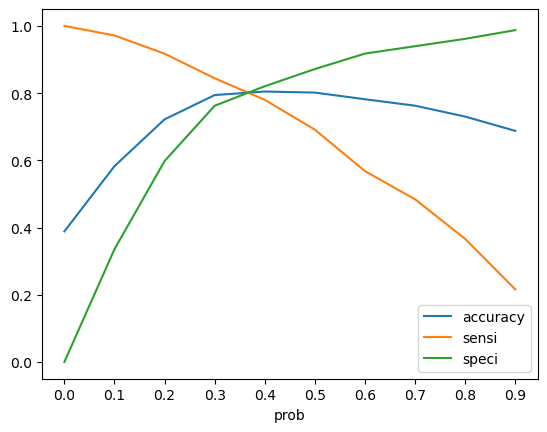

In [208]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(cutoff_df.index)
plt.show()

As per problem statement a model with high sensitivity is required by business.

From the above plot it is evident that the optimal cut-off is between 0.35 and 0.4

We will be chosing a cut-off of 0.35 to proceed with.

### 10. Training data Predictions on Final Model

In [209]:
# Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Prospect ID,Convert_Prob,Converted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted
8606,a5254b6e-8953-42ce-8904-dc5e38a1732f,0.082008,0,1,0,0,0,0,0,0,0,0,0,0
988,fb78dbb4-bade-4306-be6c-ee043e419090,0.168371,0,1,1,0,0,0,0,0,0,0,0,0
4794,26427a9a-a1f5-4125-af58-cdf40522cd14,0.735388,1,1,1,1,1,1,1,1,1,0,0,1
8893,c4b3b7c6-5767-492b-9759-eb168f204ce7,0.026265,0,1,0,0,0,0,0,0,0,0,0,0
2708,4b428f8f-97d8-4427-ad5a-e1bcf8a2ae8d,0.560364,1,1,1,1,1,1,1,0,0,0,0,1


Accruacy score of final model

In [210]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7993289662885446

Confusion Matrix of model

In [211]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3009,  818],
       [ 438, 1994]], dtype=int64)

Sensitivity of the final model

In [212]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8199013157894737

**Final Model Sensitivity is above given expectectation of 80%**

Specificity of the final model

In [213]:
confusion[0,0]/(confusion[0,0]+confusion[0,1])

0.786255552652208

### 11. ROC Curve

In [214]:
#defining function for drawing ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [215]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Convert_Prob, drop_intermediate = False )

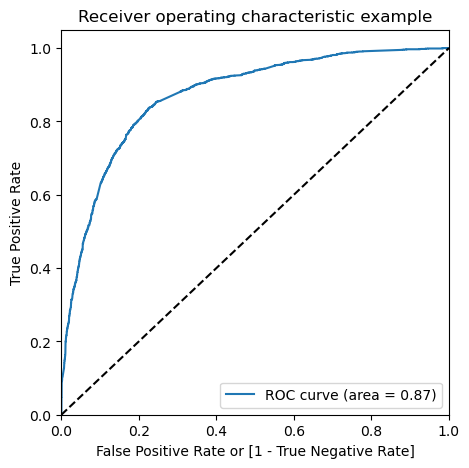

In [216]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Convert_Prob)

### 12. Making Predictions on Test dataset

In [217]:
#apply the scaler to the test dataset
X_test[num_cols] = scaler.transform(X_test[num_cols])

#check
X_test[num_cols].head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
8597,0.470588,0.590669,0.314118
215,0.117647,0.698504,0.235294
8212,0.058824,0.121479,0.117647
247,0.176471,0.095511,0.352941
5300,0.000000,0.000000,0.000000


In [218]:
#filtering out only the required features and adding the constant for working with statsmodels
X_test_sm = sm.add_constant(X_test[train_cols7])

Making predictions on the test set

In [219]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

8597    0.907631
215     0.782770
8212    0.052748
247     0.051132
5300    0.974305
4087    0.559494
6263    0.104124
3694    0.202593
5153    0.051942
6738    0.503393
dtype: float64

In [220]:
#converting y_pred to a dataframe from an array
y_pred1 = pd.DataFrame(y_test_pred)
y_pred1.head()

,0
8597,0.907631
215,0.782770
8212,0.052748
247,0.051132
5300,0.974305


In [221]:
#converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [222]:
#removing index for both dataframes to append them side by side ++

In [223]:
#appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred1],axis=1)

In [224]:
y_pred_final.head()

,Converted,0
0,1,0.907631
1,1,0.782770
2,0,0.052748
3,0,0.051132
4,0,0.974305


In [225]:
#renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Convert_Prob'})

In [228]:
#adding Prospect ID column
y_pred_final['Prospect ID'] = leads['Prospect ID']

In [229]:
#rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID', 'Converted', 'Convert_Prob'])

In [230]:
#let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Convert_Prob
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,1,0.907631
1,2a272436-5132-4136-86fa-dcc88c88f482,1,0.782770
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0.052748
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0.051132
4,3256f628-e534-4826-9d63-4a8b88782852,0,0.974305


Making Predictions

In [232]:
y_pred_final['final_predicted'] = y_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.35 else 0)

Final Accruacy

In [233]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7886693999254566

Confusion Matrix

In [235]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1356,  361],
       [ 206,  760]], dtype=int64)

Sensitivity of final model

In [236]:
confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.7867494824016563

**Final Prediction sensitivity is in the targetted ballpark of around 80%**

Specificity of final model

In [237]:
confusion2[0,0]/(confusion2[0,0]+confusion2[0,1])

0.7897495631916133